In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 导入数据


In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]],dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827],   
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

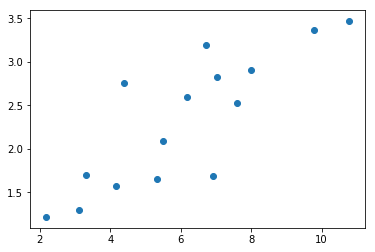

In [3]:
%matplotlib inline
plt.scatter(x_train,y_train)

# 将数据转换为Tensor

In [4]:
x = tf.constant(x_train, name='x')
y = tf.constant(y_train, name='y')

# 定义一个线性模型

In [5]:
W = tf.Variable(tf.random_normal(shape=(), seed=2017), dtype=tf.float32, name='weight')
b = tf.Variable(0, dtype=tf.float32, name='bias')

with tf.variable_scope('Linear_Model'):
    y_pred = W * x + b

# 开启交互式会话

In [6]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

现在我们可以看一下这个线性模型的输出具体⻓什么样了

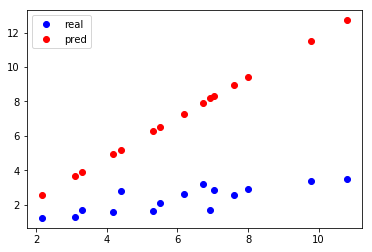

In [7]:
# 要先将`tensor`的内容`fetch`出来
y_pred_numpy = y_pred.eval()
plt.plot(x_train, y_train,' bo', label='real')
plt.plot(x_train, y_pred_numpy,' ro', label='pred')
plt.legend()

# 优化模型

## 定义误差函数
前面提到过, 为了优化我们的模型, 需要构建一个误差(loss)函数, 来告诉我们优化的好坏程度.而这里, 我们想要预测值和真实值尽可能接近,因此, 我们就用上面定义的loss进行衡量

In [8]:
# 构造loss函数
loss = tf.reduce_mean(tf.square(y_pred-y))
# 看看在当前模型下的误差有多少
print(loss.eval())

28.152378


## 现在我们用梯度下降法去优化这个模型
但实际上我们并不会这么去用, 因为tensorflow拥有自动求导功能, 省去了这些数学知识以及手工求导的复杂工作. 可以通过下面的代码去获得一个标量对参数的导函数

In [9]:
w_grad, b_grad = tf.gradients(loss,[W, b])
print('w_grad:%.2f'%w_grad.eval())
print('b_grad:%.2f'%b_grad.eval())

w_grad:68.74
b_grad:9.65


对梯度乘上一个步⻓(lr)来更新参数.一般我们把这个步⻓称为学习率

In [10]:
lr = 1e-2
#打印初始权重
print(W.eval())
print(b.eval())

w_update = W.assign_sub(lr*w_grad)
b_update = b.assign_sub(lr*b_grad)

w_update.eval()
b_update.eval()
#打印执行一次后的权重信息
print(W.eval())
print(b.eval())

1.1791532
0.0
0.49174082
-0.013156229


在更新参数完成后, 我们再一次看看模型的输出结果

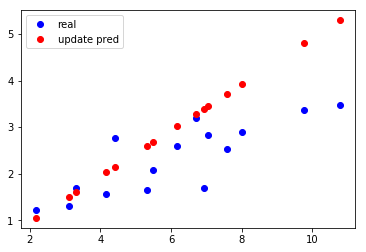

In [11]:
y_pred_update = y_pred.eval()
plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_update, 'ro', label='update pred')
plt.legend()

更新一次之后, 我们发现红色点跑到了蓝色点附近, 相比之前靠得更近了, 说明通过梯度下降模型得到了优化. 当然我们可以多更新几次

epoch: 0, loss: 0.25958630442619324
epoch: 1, loss: 0.2476622760295868
epoch: 2, loss: 0.24704627692699432
epoch: 3, loss: 0.24664157629013062
epoch: 4, loss: 0.24624277651309967
epoch: 5, loss: 0.24584607779979706
epoch: 6, loss: 0.245451420545578
epoch: 7, loss: 0.2450588494539261
epoch: 8, loss: 0.24466821551322937
epoch: 9, loss: 0.24427960813045502


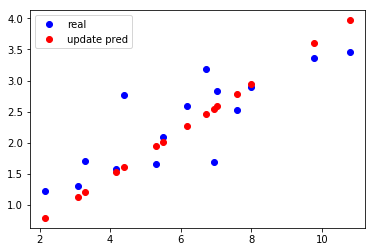

In [12]:
for i in range(10):
    sess.run([w_update,b_update])
    
    y_pred_update = y_pred.eval()
    loss_numpy = loss.eval()
    
    print('epoch: {}, loss: {}'.format(i, loss_numpy)) 


plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_pred_update, 'ro', label='update pred')
plt.legend()